In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint

In [2]:
f = open("categories.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [3]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)
len(classes)

['airplane', 'angel', 'ant', 'apple', 'banana', 'baseball', 'basketball', 'bear', 'bee', 'bicycle', 'bird', 'birthday_cake', 'blueberry', 'book', 'bread', 'bus', 'butterfly', 'cake', 'car', 'carrot', 'cat', 'circle', 'clock', 'cloud', 'computer', 'cow', 'crocodile', 'crown', 'diamond', 'dog', 'dolphin', 'door', 'dragon', 'duck', 'ear', 'elephant', 'eraser', 'eye', 'face', 'firetruck', 'fish', 'flower', 'foot', 'giraffe', 'grapes', 'guitar', 'hand', 'hat', 'horse', 'house', 'ice_cream', 'kangaroo', 'key', 'leaf', 'leg', 'lion', 'lollipop', 'mermaid', 'monkey', 'moon', 'mountain', 'mouse', 'mouth', 'nose', 'ocean', 'octopus', 'panda', 'parrot', 'pear', 'pencil', 'penguin', 'piano', 'pig', 'pizza', 'police_car', 'potato', 'rabbit', 'rain', 'rainbow', 'river', 'shark', 'sheep', 'shoe', 'smiley_face', 'snake', 'snowman', 'soccer_ball', 'star', 'strawberry', 'sun', 'swan', 'teddy-bear', 'television', 'tiger', 'train', 'tree', 'umbrella', 'watermelon', 'whale', 'zebra']


100

In [4]:
import urllib
import urllib.request
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [5]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/basketball.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bee.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/birthday%20cake.npy
https://storage.googleapis.com/quickdraw_dataset/full/nump

In [6]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=10000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(idx)
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [7]:
with tf.device('/device:GPU:0'):
    x_train, y_train, x_test, y_test, class_names = load_data('data')
    num_classes = len(class_names)
    image_size = 28

0
data\airplane.npy
1
data\angel.npy
2
data\ant.npy
3
data\apple.npy
4
data\banana.npy
5
data\baseball.npy
6
data\basketball.npy
7
data\bear.npy
8
data\bee.npy
9
data\bicycle.npy
10
data\bird.npy
11
data\birthday_cake.npy
12
data\blueberry.npy
13
data\book.npy
14
data\bread.npy
15
data\bus.npy
16
data\butterfly.npy
17
data\cake.npy
18
data\car.npy
19
data\carrot.npy
20
data\cat.npy
21
data\circle.npy
22
data\clock.npy
23
data\cloud.npy
24
data\computer.npy
25
data\cow.npy
26
data\crocodile.npy
27
data\crown.npy
28
data\diamond.npy
29
data\dog.npy
30
data\dolphin.npy
31
data\door.npy
32
data\dragon.npy
33
data\duck.npy
34
data\ear.npy
35
data\elephant.npy
36
data\eraser.npy
37
data\eye.npy
38
data\face.npy
39
data\firetruck.npy
40
data\fish.npy
41
data\flower.npy
42
data\foot.npy
43
data\giraffe.npy
44
data\grapes.npy
45
data\guitar.npy
46
data\hand.npy
47
data\hat.npy
48
data\horse.npy
49
data\house.npy
50
data\ice_cream.npy
51
data\kangaroo.npy
52
data\key.npy
53
data\leaf.npy
54
data

In [8]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

900000
900000
100000
100000


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.  81.  45.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  87. 255. 245.  25.   0.   0.   0.   0.
    7.   1.   0.   0.   0.   0.   0.   0.   4.  60. 131.  96.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 125. 252. 247. 151.  21.   0.   5. 113.
  240. 147.   0.   0.   0.   4.  93. 170. 238. 255. 247. 133.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 136. 243. 198. 252. 239. 166. 209. 255.
  241. 246.   1.   0.  29. 194. 255. 221. 148.  75.  10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 135. 255. 252. 173. 109. 231. 255. 243.
  217. 184.   0.  66. 237. 237.  81.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   9. 231. 254. 122.   0.  22. 241. 192. 243.
  225.  77.   7. 227. 208.  29.   0.   0.   0.   0.   0.  

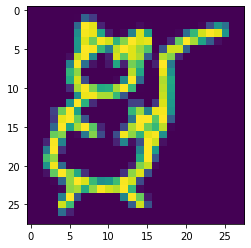

In [9]:
%matplotlib inline  
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [10]:
# Reshape and normalize
with tf.device('/device:GPU:0'):
    x_train = x_train.reshape(x_train.shape[0], image_size, imag1)e_size, .astype('float32')
    x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

    x_train /= 255.0
    x_test /= 255.0

    # Convert class vectors to class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

900000
900000
100000
100000


In [12]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(100, activation='softmax')) # class 개수 = 100
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          1

In [13]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=20)

Epoch 1/20
3165/3165 - 18s - loss: 1.3992 - top_k_categorical_accuracy: 0.8627 - val_loss: 1.0457 - val_top_k_categorical_accuracy: 0.9166
Epoch 2/20
3165/3165 - 14s - loss: 0.9699 - top_k_categorical_accuracy: 0.9235 - val_loss: 0.9318 - val_top_k_categorical_accuracy: 0.9293
Epoch 3/20
3165/3165 - 14s - loss: 0.8704 - top_k_categorical_accuracy: 0.9346 - val_loss: 0.8417 - val_top_k_categorical_accuracy: 0.9376
Epoch 4/20
3165/3165 - 14s - loss: 0.8149 - top_k_categorical_accuracy: 0.9406 - val_loss: 0.8800 - val_top_k_categorical_accuracy: 0.9351
Epoch 5/20
3165/3165 - 14s - loss: 0.7774 - top_k_categorical_accuracy: 0.9442 - val_loss: 0.7986 - val_top_k_categorical_accuracy: 0.9421
Epoch 6/20
3165/3165 - 14s - loss: 0.7480 - top_k_categorical_accuracy: 0.9474 - val_loss: 0.7953 - val_top_k_categorical_accuracy: 0.9418
Epoch 7/20
3165/3165 - 14s - loss: 0.7269 - top_k_categorical_accuracy: 0.9496 - val_loss: 0.7814 - val_top_k_categorical_accuracy: 0.9433
Epoch 8/20
3165/3165 - 14s 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 94.36%


['rainbow', 'dolphin', 'snake', 'whale', 'crocodile']


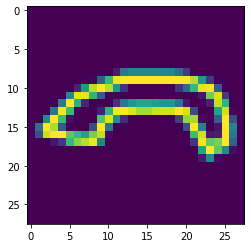

In [15]:
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [16]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [17]:
model.save('keras.h5')